In [1]:
# Normalization of global effects

# 1) all game score differentials (centered around 0?)
# 2) Team 1 specific effect -- Team 1 tends to win most games 
#    and plays against mostly weak opponents
# 3) Team 2 specific effect -- Team 2 tends to win and lose games
#    at equal rates and plays against mostly strong opponents
# 4) Specific interaction - TBD

# Predicted Score = baseline score + team 1 specific effect +
#                   team 2 specific effect + specific interaction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
compact_df = pd.read_csv('../data/RegularSeasonCompactResults.csv')
print compact_df.shape
compact_df.head()

(145289, 8)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [4]:
def get_season(data_df, year):
    '''
    returns all games for a given season (year)
    '''
    df_year = data_df[data_df['Season']==2016]
    return df_year

In [6]:
df_16 = get_season(compact_df, 2016)
df_16.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
139920,2016,11,1104,77,1244,64,H,0
139921,2016,11,1105,68,1408,67,A,1
139922,2016,11,1112,79,1334,61,H,0
139923,2016,11,1115,58,1370,56,A,0
139924,2016,11,1116,86,1380,68,H,0


In [ ]:
def 

In [14]:
df = df_16.pivot_table(values='Wscore', index='Wteam', columns='Lteam')
df.head()

Lteam,1101,1102,1103,1104,1105,1106,1107,1108,1110,1111,...,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464
Wteam,,,,,,,,,,,,,,,,,,,,,
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1105,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of games per team

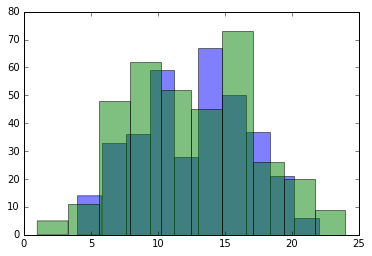

In [41]:
# distribution of home games and number of away games for all teams

A = np.array(df.notnull().sum(axis=0))
B = np.array(df.notnull().sum(axis=1))

fig,ax = plt.subplots()
ax.hist(A, alpha = 0.5)
ax.hist(B, alpha = 0.5)
plt.show()

# Score differentials per game